In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_recall_curve
import pickle
import metrics

with open('.env') as f:
    _data_pth_ = f.readline().strip()
    _data_pth_ = os.path.expanduser(_data_pth_)

### load data

In [2]:
data = pd.read_csv(f'{_data_pth_}/processed/train_transaction.csv', index_col=0)
y, X = data['isFraud'], data.drop(columns=['isFraud'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### evaluate 

In [3]:
def evaluate(model_name):
    _filename_ = model_name+".model"
    # Load the Model back from file
    with open(f'../models/{_filename_}', 'rb') as file:  
        model = pickle.load(file)
    
    sc_train = model.score(X_train, y_train)
    sc_test = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    probs=model.predict_proba(X_test)
    print(sc_train)
    print(sc_test)
    metrics.conf_matrix(y_test,y_pred_test)
    metrics.roc_pr_curve(y_test,probs)
    

0.9720745789956554
0.9723674690448946
Test data
[[1764, 187730], [384, 5001]]
Misclassification error =  5385
SENS(recall)  =  0.2607538802660754
SPEC   =  0.9979586846274068
PPV(Precision)   =  0.8212290502793296
NPV   =  0.9740519169204747
F1-SCORE =  0.3958263211040054
TransactionID
3561385    0
3542744    0
3520316    0
3434172    0
3356206    0
          ..
3424689    0
3086253    0
3094169    0
3334193    0
3506828    0
Name: isFraud, Length: 194879, dtype: int64


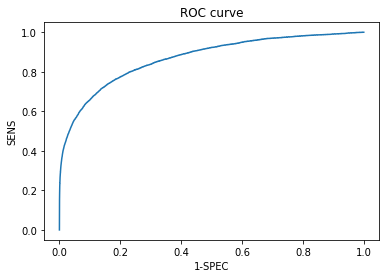

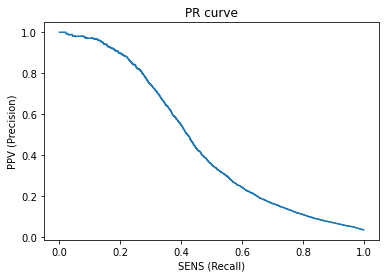

In [4]:
evaluate("LR")